In [2]:
import os
import json
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
import geopandas as gpd

In [3]:
pip install fiona

Note: you may need to restart the kernel to use updated packages.


In [7]:
stops = pd.read_csv('stops.txt')
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,262,662,Danforth Rd at Kennedy Rd,NaN,43.714379,-79.260939,NaN,NaN,NaN,NaN,NaN,1
1,263,929,Davenport Rd at Bedford Rd,NaN,43.674448,-79.399659,NaN,NaN,NaN,NaN,NaN,1
2,264,940,Davenport Rd at Dupont St,NaN,43.675511,-79.401938,NaN,NaN,NaN,NaN,NaN,2
3,265,1871,Davisville Ave at Cleveland St,NaN,43.702088,-79.378112,NaN,NaN,NaN,NaN,NaN,1
4,266,11700,Disco Rd at Attwell Dr,NaN,43.701362,-79.594843,NaN,NaN,NaN,NaN,NaN,1


In [8]:
from shapely.geometry import Point

In [50]:
stops['coordinates'] = list(zip(stops['stop_lon'], stops['stop_lat']))
stops['coordinates'] = stops['coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(stops, geometry = 'coordinates')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9398 entries, 0 to 9397
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   stop_id              9398 non-null   int64   
 1   stop_code            9398 non-null   int64   
 2   stop_name            9398 non-null   object  
 3   stop_desc            0 non-null      float64 
 4   stop_lat             9398 non-null   float64 
 5   stop_lon             9398 non-null   float64 
 6   zone_id              0 non-null      float64 
 7   stop_url             0 non-null      float64 
 8   location_type        0 non-null      float64 
 9   parent_station       0 non-null      float64 
 10  stop_timezone        0 non-null      float64 
 11  wheelchair_boarding  9398 non-null   int64   
 12  coordinates          9398 non-null   geometry
dtypes: float64(8), geometry(1), int64(3), object(1)
memory usage: 954.6+ KB


In [33]:
all_stops = list(stops['stop_name'].unique())
len(all_stops)

7594

In [52]:
stops['stop_id'].nunique()

9398

In [21]:
city = gpd.read_file('toronto_crs84.geojson')


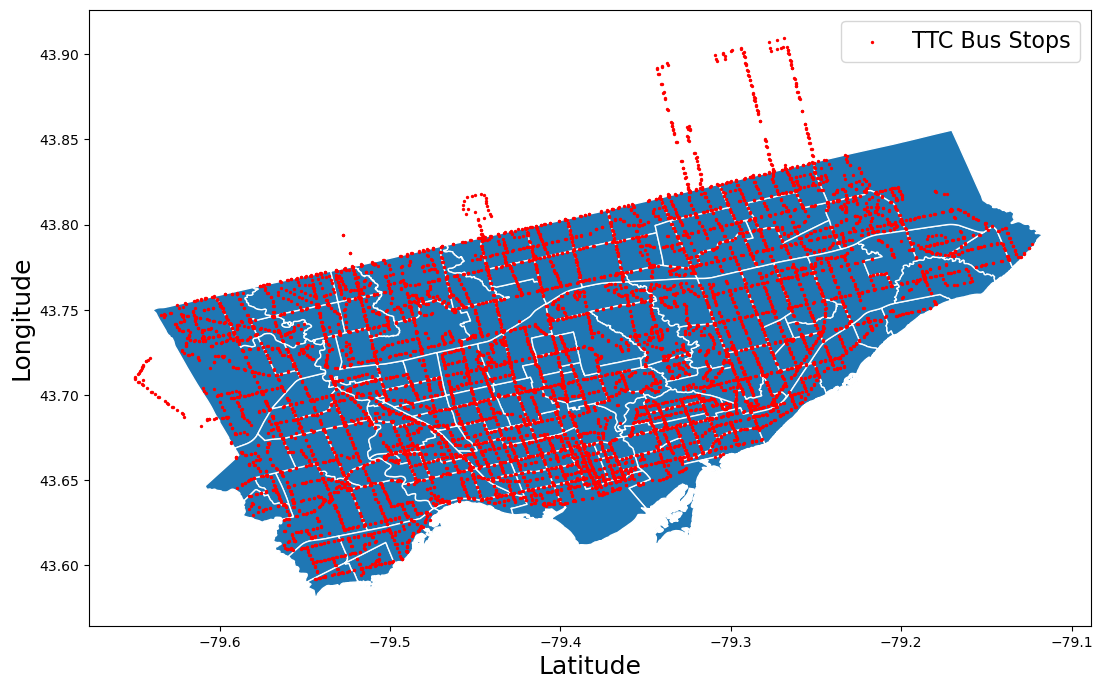

In [28]:
ax = city.plot(figsize=(15, 8), edgecolor='w')
gdf.plot(ax=ax, color='red', label='TTC Bus Stops', markersize = 2)
plt.legend(fontsize=16)
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Longitude', fontsize=18);

In [65]:
# PLAYING AROUND WITH ROUTE NAMES ETC
shapes = pd.read_csv('shapes.txt')
routes = pd.read_csv('routes.txt')
uoft_data = gpd.read_file('TTC Bus and Streetcar Routes March 2011_polyline.shp')

In [39]:
shapes['coordinates'] = list(zip(shapes['shape_pt_lon'], shapes['shape_pt_lat']))
shapes['coordinates'] = shapes['coordinates'].apply(Point)
shapes_gdf = gpd.GeoDataFrame(shapes, geometry = 'coordinates')

c:\Users\avery\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

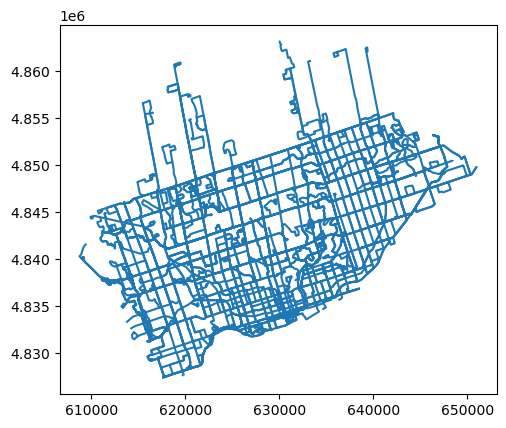

In [71]:
shapes['shape_id'].nunique()
# routes['route_id'].nunique()
# routes.head()
# shapesgdf = shapes_gdf.head(50000)
# shapesgdf.plot(markersize = 2)
uoft_data.plot()